In [1]:
import pandas as pd
df = pd.read_pickle("churn_prediction_v3.pkl")
df.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,2401,66,Male,0,self_employed,187,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0.0
1,2648,35,Male,0,self_employed,100000,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0.0
2,2494,31,Male,0,salaried,146,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0.0
3,2629,90,Male,1,self_employed,1020,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1.0
4,1879,42,Male,2,self_employed,1494,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1.0


In [3]:
df['vintage'].min(), df['vintage'].max()

(438, 2776)

In [10]:
import matplotlib.pyplot as plt

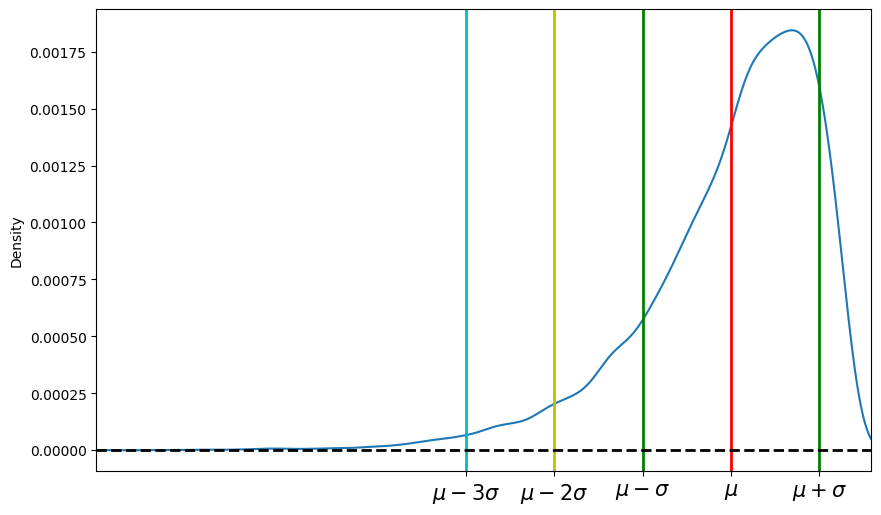

In [20]:
plt.figure(figsize=(10,6))

df['vintage'].plot.kde()
plt.xlim([df['vintage'].min()-5, df['vintage'].max()+50])
ticks_pos = [df['vintage'].mean()-3*df['vintage'].std(), \
             df['vintage'].mean()-2*df['vintage'].std(), \
             df['vintage'].mean()-df['vintage'].std(), \
             df['vintage'].mean(), \
             df['vintage'].mean()+df['vintage'].std() ]
             
             
plt.xticks(ticks_pos, labels=['$\mu-3\sigma$', '$\mu-2\sigma$', '$\mu-\sigma$', '$\mu$',  '$\mu+\sigma$'], fontsize=15)

plt.axvline(df['vintage'].mean(), color='r', ls='-', lw=2)
plt.axvline(df['vintage'].mean()-df['vintage'].std(), color='g', ls='-', lw=2)
plt.axvline(df['vintage'].mean()+df['vintage'].std(), color='g', ls='-', lw=2)
plt.axvline(df['vintage'].mean()-2*df['vintage'].std(), color='y', ls='-', lw=2)
plt.axvline(df['vintage'].mean()-3*df['vintage'].std(), color='c', ls='-', lw=2)

plt.axhline([0], color='k', ls='--', lw=2)

In [22]:
z_scores = (df['vintage'] - df['vintage'].mean() ) / df['vintage'].std()

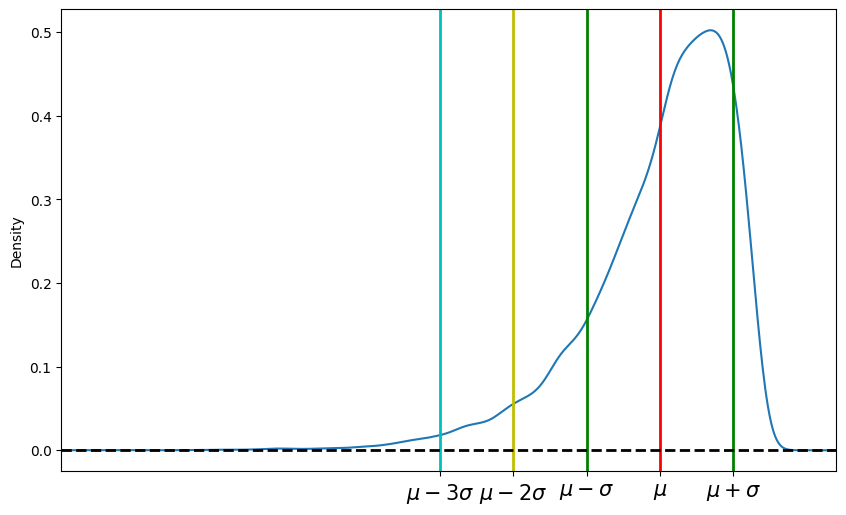

In [26]:
plt.figure(figsize=(10,6))

z_scores.plot.kde()
plt.xlim([z_scores.min()-1, z_scores.max()+1])
ticks_pos = [-3, -2, -1, 0, 1]
             
plt.xticks(ticks_pos, labels=['$\mu-3\sigma$', '$\mu-2\sigma$', '$\mu-\sigma$', '$\mu$',  '$\mu+\sigma$'], fontsize=15)

plt.axvline(0, color='r', ls='-', lw=2)
plt.axvline(-1, color='g', ls='-', lw=2)
plt.axvline(1, color='g', ls='-', lw=2)
plt.axvline(-2, color='y', ls='-', lw=2)
plt.axvline(-3, color='c', ls='-', lw=2)

plt.axhline([0], color='k', ls='--', lw=2)

In [28]:
import numpy as np

In [29]:
# A Statistics Exam Scores of students, out of 50
# Passign marks = 60% of the total =>> 30
scores = np.array([5, 12, 6, 15, 18, 22, 19, 28, 33, 38, 40, 26, 42])

# which means>> 5, 12, 6, 15, 18, 22, 19, 28, 26 >>> FAIL >>> 80% students Fail!!!

In [ ]:
# Okay, All students whi score less than 1 std dev from the mean will fail !!!

In [30]:
scores_df = pd.DataFrame(scores, columns=['Scores'])
scores_df

,Scores
0,5
1,12
2,6
3,15
4,18
5,22
6,19
7,28
8,33
9,38


<AxesSubplot:>

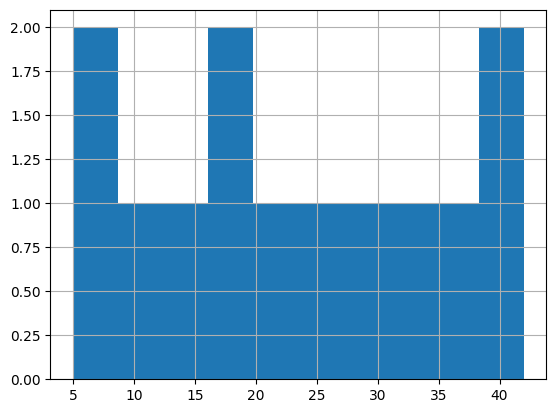

In [37]:
scores_df['Scores'].hist()

In [34]:
scores_df['Z-scores'] = ( scores_df['Scores'] - scores_df['Scores'].mean() ) / scores_df['Scores'].std()
scores_df['Z-scores'] = np.round(scores_df['Z-scores'], 2)
scores_df

,Scores,Z-scores
0,5,-1.48
1,12,-0.92
2,6,-1.40
3,15,-0.68
4,18,-0.43
5,22,-0.11
6,19,-0.35
7,28,0.37
8,33,0.78
9,38,1.18


In [38]:
scores_df.describe()

,Scores,Z-scores
count,13.000000,13.000000
mean,23.384615,0.000769
std,12.406574,1.000254
min,5.000000,-1.480000
25%,15.000000,-0.680000
50%,22.000000,-0.110000
75%,33.000000,0.780000
max,42.000000,1.500000
